<a href="https://colab.research.google.com/github/aquiehti/Data-Science/blob/master/Projeto01_Analisando_os_Dados_do_Airbnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



#### **Curso Data Science na Prática 2.0**

*by Ricardo Lopes*

---

# Projeto 01 - Análise dos Dados do Airbnb - *Barcelona - Espanha*

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade de Barcelona, e ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados

Todos os dados usados neste Projeto foram obtidos a partir do site [Inside Airbnb](http://insideairbnb.com/get-the-data.html).
Para esta análise exploratória inicial, será baixado apenas o seguinte arquivo:


* listings.csv - Summary information and metrics for listings in Barcelona (good for visualisations).





In [3]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline



/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv("http://data.insideairbnb.com/spain/catalonia/barcelona/2020-05-11/visualisations/listings.csv")


## Análise dos Dados
Esta etapa tem por objetivo criar uma consciência situacional inicial e permitir um entendimento de como os dados estão estruturados.

**Dicionário das variáveis**

* id - número de id gerado para identificar o imóvel
* name - nome da propriedade anunciada
* host_id - número de id do proprietário (anfitrião) da propriedade
* host_name - Nome do anfitrião
* neighbourhood_group - esta coluna não contém nenhum valor válido
* neighbourhood - nome do bairro
* latitude - coordenada da latitude da propriedade
* longitude - coordenada da longitude da propriedade
* room_type - informa o tipo de quarto que é oferecido
* price - preço para alugar o imóvel
* minimum_nights - quantidade mínima de noites para reservar
* number_of_reviews - número de reviews que a propriedade possui
* last_review - data do último review
* reviews_per_month - quantidade de reviews por mês
* calculated_host_listings_count - quantidade de imóveis do mesmo anfitrião
* availability_365 - número de dias de disponibilidade dentro de 365 dias

Antes de iniciar qualquer análise, vamos verificar a cara do nosso dataset, analisando as 5 primeiras entradas.

In [5]:
# mostrar as 5 primeiras entradas
df.head()


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,21974,Comf. double room/private bathroom,73163,Andres,Ciutat Vella,el Barri Gòtic,41.38077,2.17551,Private room,60,3,2,2017-11-06,0.05,3,90
1,23197,Forum DeLuxe 5 mins Walk To CCIB Center & Sea★,90417,Etain (Marnie),Sant Martí,el Besòs i el Maresme,41.41291,2.22063,Entire home/apt,220,3,52,2019-12-15,0.47,2,345
2,31958,"Gaudi Attic 1, Friendly Rentals",136853,Fidelio,Gràcia,el Camp d'en Grassot i Gràcia Nova,41.40950,2.15938,Entire home/apt,58,1,188,2020-03-09,1.67,29,337
3,32471,"Gaudi Attic 2, Friendly Rentals",136853,Fidelio,Gràcia,el Camp d'en Grassot i Gràcia Nova,41.40928,2.16112,Entire home/apt,66,1,94,2020-03-07,0.83,29,331
4,32711,Sagrada Familia area - Còrsega 1,135703,Nick,Gràcia,el Camp d'en Grassot i Gràcia Nova,41.40566,2.17015,Entire home/apt,140,2,63,2020-02-22,0.59,6,329


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**
Vamos prosseguir e identificar a quantidade de entradas que nosso conjunto de dados possui e ver os tipos de cada coluna.
Este *dataset* que baixamos é a versão "resumida" do Airbnb. Na mesma página que baixamos o arquivo listings.csv há uma versão completa com mais entradas e maior número de variáveis.

In [6]:
# identificar o volume de dados do DataFrame
print("Entradas:\t {}".format(df.shape[0]))
print("Variáveis:\t {}\n".format(df.shape[1]))

# verificar as 5 primeiras entradas do dataset
display(df.dtypes)


Entradas:	 20858
Variáveis:	 16



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

A quantidade de um *dataset* está diretamente relacionada à quantidade de valores ausentes. É importante entender logo no iníciose esses valores nulos são significativos comparados ao total de entradas.
* É possível ver que a coluna neigbourhood_group possui 100% dos seus valores faltantes
* As variáveis reviews_per_month e last_review possuem valores nulos em quanse  metade das linhas
* As variáveis name e hest_name têm aproximadamente 0,1% dos valores nulos.

In [6]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

reviews_per_month                 0.256352
last_review                       0.256352
name                              0.000719
host_name                         0.000288
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
neighbourhood_group               0.000000
host_id                           0.000000
id                                0.000000
dtype: float64

### **Q3. Qual o tipo de distribuição das variáveis?** 

Para identificar a distribuição das variáveis, irei plotar o histograma.

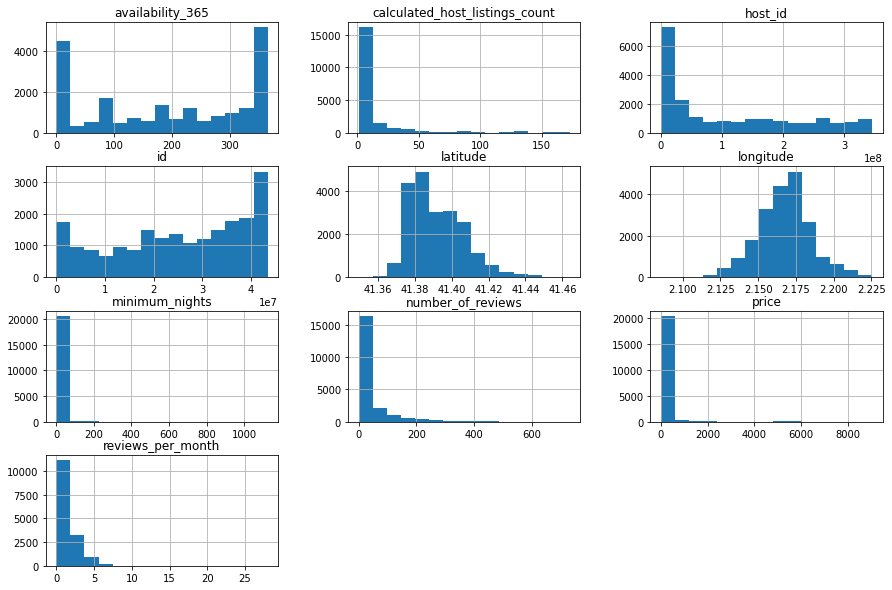

In [7]:
# plotar o histograma das variáveis numéricas
df.hist(bins=15, figsize=(15,10));

### **Q4. Qual a média dos preços de aluguel?**

In [8]:
# ver a média da coluna `price``
df[['price']].describe()



,price
count,20858.000000
mean,124.210711
std,405.947246
min,0.000000
25%,36.000000
50%,59.000000
75%,100.000000
max,9034.000000


### **Q4. Qual a correlação existente entre as variáveis**
Correlação significa que existe uma relação entre duas coisas. No nosso contexto, estamos buscando relação ou semelhança entre duas variáveis.

Essa relação pode ser medida, e é função do coeficiente de correlação estabelecer qual a intensidade dela. Para identificar as correlações existentes entre as variáveis de interesse, vou:

* Criar uma matriz de correlação
* Gerar um heatmap a partir dessa matriz, usando a biblioteca seaborn

In [9]:
# criar uma matriz de correlação
corr = df [['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()

# mostrar a matriz de correlação
display(corr)


,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,0.020956,-0.026084,-0.040781,0.051753,0.070564
minimum_nights,0.020956,1.000000,-0.156790,-0.190539,0.118974,0.125149
number_of_reviews,-0.026084,-0.156790,1.000000,0.710272,-0.118018,0.074415
reviews_per_month,-0.040781,-0.190539,0.710272,1.000000,-0.121411,0.026008
calculated_host_listings_count,0.051753,0.118974,-0.118018,-0.121411,1.000000,0.220312
availability_365,0.070564,0.125149,0.074415,0.026008,0.220312,1.000000


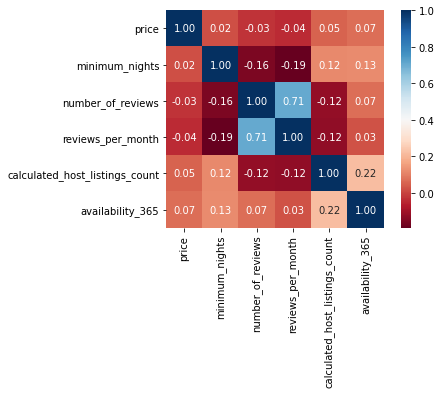

In [10]:
# plotar um heatmap a partir das correlações
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);


### **Q5. Qual o tipo de imóvel mais alugado no Airbnb?**
A coluna da variável room_type indica o tipo de locação que está anunciada no Airbnb. Se você já alugou no site, sabe que existem opções de apartamentos/casas inteiras, apenas o aluguel de um quarto ou mesmo dividir o quarto com outras pessoas.

Vamos contar a quantidade de ocorrências de cada tipo de aluguel, usando o método value_counts().

In [11]:
# mostrar a quantidade de cada tipo de imóvel disponível
df.room_type.value_counts()


Private room       10610
Entire home/apt     9554
Hotel room           454
Shared room          240
Name: room_type, dtype: int64

In [12]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df.room_type.value_counts() / df.shape[0]


Private room       0.508678
Entire home/apt    0.458050
Hotel room         0.021766
Shared room        0.011506
Name: room_type, dtype: float64

### **Q6. Qual a localidade mais cara do dataset?**
Uma maneira de se verificar uma variável em função da outra é usando groupby(). No caso, queremos comparar os bairros (neighbourhoods) a partir do preço de locação


In [13]:
# ver preços por bairros, na média
df.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]


neighbourhood
la Marina del Prat Vermell                      717.285714
Diagonal Mar i el Front Marítim del Poblenou    256.221622
Sant Antoni                                     236.876298
la Dreta de l'Eixample                          231.313917
el Poblenou                                     184.834000
Vallvidrera, el Tibidabo i les Planes           179.545455
la Vila Olímpica del Poblenou                   175.445000
l'Antiga Esquerra de l'Eixample                 174.792606
Vallcarca i els Penitents                       173.161538
Sant Gervasi - Galvany                          144.853994
Name: price, dtype: float64

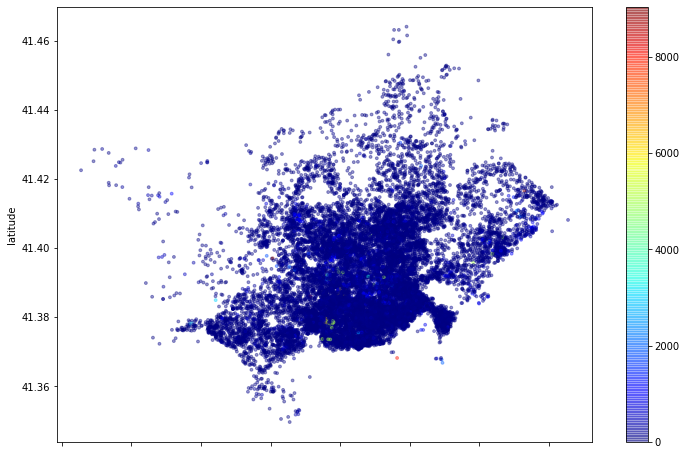

In [14]:
# plotar os imóveis pela latitude-longitude
df.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df['price'], s=8,cmap=plt.get_cmap('jet'), figsize=(12,8));


### **Q7. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

In [15]:
# ver a média da coluna `minimum_nights``
df[['minimum_nights']].describe()

,minimum_nights
count,20858.000000
mean,9.916051
std,20.589782
min,1.000000
25%,1.000000
50%,2.000000
75%,6.000000
max,1124.000000


## Conclusões
Foi feita apenas uma análise superficial na base de dados do Airbnb, porém já se percebeu que existem outliers em algumas das variáveis.

Também se notou que em algumas localidades há poucos imóveis disponíveis, o que pode distorcer as informações estatísticas de alguns atributos.

Por fim, lembra-se que este dataset é uma versão resumida, ideal apenas para uma abordagem inicial. Recomenda-se que seja usado, em uma próxima análise exploratória, o conjunto de dados completos, com 106 atributos disponíveis.
